In [1]:
import pandas as pd
import os
import random
filename = 'C:/Users/endwy/Documents/Columbia MSBA/Spring 2019/E4650 - Business Analytics/Project - Kickstarter Analysis/raw_data/df_kickstarterFE.csv'
df = pd.read_csv(filename, header=0)
df.drop(columns=('Unnamed: 0'),inplace=True)
df.dropna(axis=0,how='any',inplace=True)
df=df[:100]
len(df)

100

In [12]:
df.columns

Index(['Launch_deadline_days', 'Cat_Name', 'country', 'staff_pick', 'state',
       'backers_count', 'blurb', 'goal', 'launched_at', 'usd_pledged',
       'deadline', 'name', 'SENTIMENT_VALUE', 'SENTIMENT'],
      dtype='object')

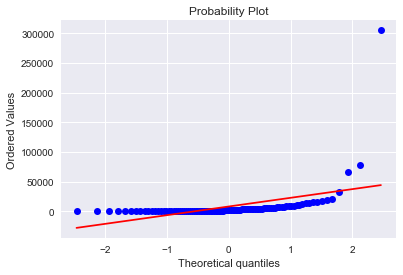

In [13]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(df['usd_pledged'], dist="norm", plot=pylab)
pylab.show()

In [14]:
df.corr()

,Launch_deadline_days,Cat_Name,country,staff_pick,state,backers_count,goal,launched_at,usd_pledged,deadline,SENTIMENT_VALUE
Launch_deadline_days,1.000000,0.054254,0.061642,0.085985,0.190287,0.017150,0.218233,-0.245468,0.028049,-0.239089,-0.100421
Cat_Name,0.054254,1.000000,-0.047826,-0.056135,0.163820,0.095684,0.240112,0.062329,0.087910,0.036366,0.038310
country,0.061642,-0.047826,1.000000,0.022405,-0.054270,0.056865,0.214832,-0.119613,0.008184,-0.079121,0.041083
staff_pick,0.085985,-0.056135,0.022405,1.000000,-0.247517,0.431896,0.195151,0.000337,0.395703,-0.060337,0.006868
state,0.190287,0.163820,-0.054270,-0.247517,1.000000,-0.168457,-0.016140,0.068112,-0.162757,0.018856,0.135983
backers_count,0.017150,0.095684,0.056865,0.431896,-0.168457,1.000000,0.359286,-0.000081,0.987120,-0.012037,-0.109048
goal,0.218233,0.240112,0.214832,0.195151,-0.016140,0.359286,1.000000,-0.040531,0.314309,-0.029305,-0.100995
launched_at,-0.245468,0.062329,-0.119613,0.000337,0.068112,-0.000081,-0.040531,1.000000,0.037054,0.691301,-0.025022
usd_pledged,0.028049,0.087910,0.008184,0.395703,-0.162757,0.987120,0.314309,0.037054,1.000000,0.014922,-0.108836
deadline,-0.239089,0.036366,-0.079121,-0.060337,0.018856,-0.012037,-0.029305,0.691301,0.014922,1.000000,-0.154335


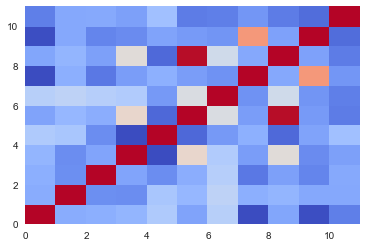

In [15]:
import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

In [16]:
df.sort_values(['usd_pledged'],inplace=True)

In [17]:
df.head(3)

,Launch_deadline_days,Cat_Name,country,staff_pick,state,backers_count,blurb,goal,launched_at,usd_pledged,deadline,name,SENTIMENT_VALUE,SENTIMENT
99,60,28,9,0,1,0,Film amateur sur la montée de Lucifer sur terr...,5000.0,0,0.0,3,Lucifer's rise,3,Neutral
97,60,14,0,0,1,0,Generations Farm is dedicated fo bringing you ...,50000.0,3,0.0,7,Generations Farm & Event space,5,V.Positive
32,15,10,2,0,1,0,"5 minute videos, uploaded daily, packed with s...",500.0,6,0.0,4,Five Minute Golfer - Stretching and Mobility f...,5,V.Positive


### sentiment analysis

In [2]:
all_reviews = df['blurb']
all_sent_values = []
all_sentiments = []

In [3]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [8]:
sample = df['blurb'][0]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

In the year 2025, a young man's superintelligent AI system tells him that he must go on a date or face certain suicide from loneliness.
Sentiment: 
-0.7


In [5]:
for i in range(len(df)):
    all_sent_values.append(sentiment_value(df.iloc[i].loc['blurb']))

In [9]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(len(df)):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)

In [10]:
df['SENTIMENT_VALUE'] = SENTIMENT_VALUE
df['SENTIMENT'] = SENTIMENT

In [11]:
df.head(4)

,Launch_deadline_days,Cat_Name,country,staff_pick,state,backers_count,blurb,goal,launched_at,usd_pledged,deadline,name,SENTIMENT_VALUE,SENTIMENT
0,30,0,0,0,0,108,"In the year 2025, a young man's superintellige...",4000.0,0,5265.82,0,A Date in 2025 - A sci-fi comedy short film,1,V.Negative
1,44,1,0,1,0,37,Replacement Place needs your support to combat...,5000.0,1,5225.00,1,Replacement Place | New York Live Arts,5,V.Positive
2,14,2,0,0,0,27,Pumpkin Spice Love - A Pumpkin Spice 4 Life 30...,250.0,0,362.00,2,Pumpkin Spice Love!,5,V.Positive
3,30,3,0,0,0,184,Single mama and her 4-year old sail with all-f...,15000.0,2,15678.00,3,Pirate Mama,3,Neutral
